# Which city would you like to live?

*** City Fynders Group: Xiangyu Zhang, Wendan Yan, Yiran Zhang, Zhuochen Han***

In [1]:
import os

import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


%matplotlib inline

## Read data

In [2]:
natural = pd.read_csv('../data/Natural.csv')

### Natural data analysis

In [3]:
natural.head()

,City,State,Jan_T,April_T,july_T,Oct_T,Prep_inch,Prep_days,Snowfall_inch,Green_score,Air,Water_quality,Toxics,Hazardous,Sanitation
0,Atlanta,GA,42.7,61.6,80.0,62.8,50.20,115.0,2.1,43.36,15,26,4,11,39.0
1,Austin,TX,50.2,68.3,84.2,70.6,33.65,85.0,0.9,55.68,44,9,48,50,NaN
2,Baltimore,MD,32.3,53.2,76.5,55.4,41.94,115.0,21.5,50.81,16,33,14,24,41.0
3,Birmingham,AL,42.6,61.3,80.2,62.9,53.99,117.0,1.5,44.45,8,20,8,28,33.0
4,Boston,MA,29.3,48.3,73.9,54.1,42.53,127.0,42.8,61.37,29,7,39,5,11.0


In [4]:
coeff = np.corrcoef(natural['Jan_T'], natural['Snowfall_inch'])
coeff

array([[ nan,  nan],
       [ nan,  nan]])

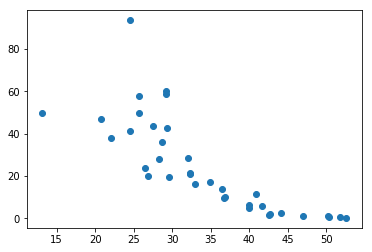

In [5]:
plt.scatter(natural['Jan_T'], natural['Snowfall_inch'])

In [6]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
loc = geolocator.geocode('Chicago')
loc

Location(Chicago, Cook County, Illinois, United States of America, (41.8755546, -87.6244212, 0.0))

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import math

b
scale = 5

cities = [["Chicago",10],
          ["Boston",10],
          ["New York",5],
          ["San Francisco",25]]

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('st99_d00', name='states', drawbounds=True)

# Get the location of each city and plot it
geolocator = Nominatim()
for (city,count) in cities:
    loc = geolocator.geocode(city)
    x, y = map(loc.longitude, loc.latitude)
    map.plot(x,y,marker='o',color='Red',markersize=int(math.sqrt(count))*scale)
plt.show()

NameError: name 'b' is not defined

In [ ]:
geolocator.geocode?

In [ ]:
cities = [["Chicago",10],
          ["Boston",10],
          ["New York",5],
          ["San Francisco",25]]
cities

In [ ]:
import mpl_toolkits.Basemap

In [22]:
import plotly
import plotly.plotly as py
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv')
df.head()

df['text'] = df['name'] + '<br>Population ' + (df['pop']/1e6).astype(str)+' million'
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]
cities = []
scale = 5000

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    city = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['pop']/scale,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1]) )
    cities.append(city)

layout = dict(
        title = '2014 US city populations<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict( data=cities, layout=layout )
plotly.offline.plot( fig, validate=False, filename='d3-bubble-map-populations' )

/Users/han/anaconda3/lib/python3.6/site-packages/plotly/offline/offline.py:459: UserWarning:

Your filename `d3-bubble-map-populations` didn't end with .html. Adding .html to the end of your file.



'file:///Users/han/Google Drive/CSE583/Project/uwseds-group-city-fynders/Docs/d3-bubble-map-populations.html'

### Ranking natural data

In [8]:
natural.columns

Index(['City', 'State', 'Jan_T', 'April_T', 'july_T', 'Oct_T', 'Prep_inch',
       'Prep_days', 'Snowfall_inch', 'Green_score', 'Air', 'Water_quality',
       'Toxics', 'Hazardous', 'Sanitation'],
      dtype='object')

In [9]:
type(natural['City'])

pandas.core.series.Series

Based on the natural data, we give default ranking based on `Green_score`, `Air`, `water_quality`, `Toxics`, `Hazardous` and `Sanitation`. For climate data (temperature, precipitation and snow, we do not include into the ranking factors, since people have different preferences.

In [14]:
natural['Green_score_rank'] = natural['Green_score'].rank(ascending=1)
natural['Green_score_rank'].fillna(natural['Green_score_rank'].max()+1, inplace=True)
natural['Sanitation'].fillna(natural['Sanitation'].max()+1, inplace=True)
natural.head()

,City,State,Jan_T,April_T,july_T,Oct_T,Prep_inch,Prep_days,Snowfall_inch,Green_score,Air,Water_quality,Toxics,Hazardous,Sanitation,Green_score_rank,Natural_total_score
0,Atlanta,GA,42.7,61.6,80.0,62.8,50.20,115.0,2.1,43.36,15,26,4,11,39.0,9.0,65.0
1,Austin,TX,50.2,68.3,84.2,70.6,33.65,85.0,0.9,55.68,44,9,48,50,51.0,33.0,184.0
2,Baltimore,MD,32.3,53.2,76.5,55.4,41.94,115.0,21.5,50.81,16,33,14,24,41.0,26.0,113.0
3,Birmingham,AL,42.6,61.3,80.2,62.9,53.99,117.0,1.5,44.45,8,20,8,28,33.0,12.0,76.0
4,Boston,MA,29.3,48.3,73.9,54.1,42.53,127.0,42.8,61.37,29,7,39,5,11.0,37.0,117.0


In [23]:
natural['Natural_total_score'] = (natural['Air'] + natural['Water_quality'] + natural['Toxics'] 
                                  + natural['Hazardous'] + natural['Green_score_rank'])
natural['Natural_total_rank'] = natural['Natural_total_score'].rank(ascending=1)
natural

,City,State,Jan_T,April_T,july_T,Oct_T,Prep_inch,Prep_days,Snowfall_inch,Green_score,Air,Water_quality,Toxics,Hazardous,Sanitation,Green_score_rank,Natural_total_score,Natural_total_rank
0,Atlanta,GA,42.7,61.6,80.0,62.8,50.20,115.0,2.1,43.36,15,26,4,11,39.0,9.0,65.0,3.0
1,Austin,TX,50.2,68.3,84.2,70.6,33.65,85.0,0.9,55.68,44,9,48,50,51.0,33.0,184.0,44.5
2,Baltimore,MD,32.3,53.2,76.5,55.4,41.94,115.0,21.5,50.81,16,33,14,24,41.0,26.0,113.0,19.0
3,Birmingham,AL,42.6,61.3,80.2,62.9,53.99,117.0,1.5,44.45,8,20,8,28,33.0,12.0,76.0,8.0
4,Boston,MA,29.3,48.3,73.9,54.1,42.53,127.0,42.8,61.37,29,7,39,5,11.0,37.0,117.0,20.5
5,Buffalo,NY,24.5,45.3,70.8,50.7,40.54,169.0,93.6,58.44,34,50,27,26,47.0,34.0,171.0,43.0
6,Charlotte,NC,41.7,60.9,80.3,61.7,43.51,112.0,5.6,49.46,28,34,22,27,28.0,21.0,132.0,25.5
7,Chicago,IL,22.0,47.8,73.3,52.1,36.27,125.0,38.0,49.50,3,6,7,4,18.0,22.0,42.0,1.0
8,Cincinnati,OH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.52,19,35,11,38,34.0,28.0,131.0,24.0
9,Cleveland,OH,25.7,47.6,71.9,52.2,38.71,155.0,57.6,39.46,9,25,26,31,26.0,3.0,94.0,14.0


### Map natural data

In [ ]:
import plotly
import plotly.plotly as py
import pandas as pd

df = natural
df.head()

# df['text'] = df['name'] + '<br>Population ' + (df['pop']/1e6).astype(str)+' million'
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]
cities = []
scale = 5000

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    city = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['pop']/scale,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1]) )
    cities.append(city)

layout = dict(
        title = '2014 US city populations<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict( data=cities, layout=layout )
plotly.offline.plot( fig, validate=False, filename='d3-bubble-map-populations' )